In [16]:
import pandas as pd

# Load your data
df = pd.read_excel('42_Cases_under_crime_against_women (1).xlsx')

# ------- FEATURE ENGINEERING -------

# Conviction Rate (Convicted / Reported)
df['Conviction_Rate'] = df['Cases_Convicted'] / df['Cases_Reported']

# Chargesheet Rate (Chargesheeted / Reported)
df['Chargesheet_Rate'] = df['chargesheet_police_work'] / df['Cases_Reported']

# Withdrawal Rate (Withdrawn by Govt / Reported)
df['Withdrawal_Rate'] = df['Cases_Withdrawn_by_the_Govt'] / df['Cases_Reported']

# Investigation Backlog Rate (Pending Investigation at Year End / Reported)
df['Investigation_Backlog_Rate'] = df['Cases_Pending_Investigation_at_Year_End'] / df['Cases_Reported']

# Trial Backlog Rate (Pending Trial at Year End / Sent for Trial)
df['Trial_Backlog_Rate'] = df['Cases_Pending_Trial_at_Year_End'] / df['Cases_Sent_for_Trial']

# False Case Rate
df['False_Case_Rate'] = df['Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'] / df['Cases_Reported']

# Composite Severity Score (example)
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

# Annual Change for each AreaName/Crime Type
df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()

# ---- (Optional) Save or preview the new features ----
#df.to_excel('feature_engineering_output.xlsx', index=False)

df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()


rates_table = df[['Area_Name', 'Group_Name', 'Year',
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change']]
rates_table.to_excel('rates_table_output.xlsx', index=False)

# Preview (first 10 rows):
rates_table.head(5)

Area_Name                        Group_Name  Year  \
1750  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2001   
1785  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2002   
1820  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2003   
1855  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2004   
1890  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2005   

      Conviction_Rate  Chargesheet_Rate  Withdrawal_Rate  \
1750              0.0          0.555556              0.0   
1785              0.0          0.750000              0.0   
1820              0.0          0.428571              0.0   
1855              0.0          0.600000              0.0   
1890              0.0          0.200000              0.0   

      Investigation_Backlog_Rate  Trial_Backlog_Rate  False_Case_Rate  \
1750                    0.444444            2.000000              0.0   
1785                    0.000000            3.333333              0.0   
1820                    0.428571            3.666667              0.0   
1855                    0.600000            3.666667              0.0   
1890                    0.800000           12.000000              0.0   

      Severity_Score  Annual_Case_Change  
1750        1.555556                 NaN  
1785        2.250000           -0.555556  
1820        1.785714            0.750000  
1855        2.100000           -0.285714  
1890        2.200000            0.000000

In [17]:
import pandas as pd

# Load data
df = pd.read_excel('42_Cases_under_crime_against_women (1).xlsx')

# List of columns to smooth by adding 1
cols_to_smooth = [
    'Cases_Convicted',
    'Cases_Reported',
    'chargesheet_police_work',
    'Cases_Acquitted_or_Discharged',
    'Cases_Sent_for_Trial',
    'Cases_Withdrawn_by_the_Govt',
    'Cases_Pending_Investigation_at_Year_End',
    'Cases_Pending_Trial_at_Year_End',
    'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'
]

# Add 1 to every value in these columns
df[cols_to_smooth] = df[cols_to_smooth] + 1

# Save the smoothed data to a new Excel file
df.to_excel('smoothed_cases_data.xlsx', index=False)


In [18]:
import pandas as pd

# Load your data
df = pd.read_excel('smoothed_cases_data.xlsx')

# ------- FEATURE ENGINEERING -------

# Conviction Rate (Convicted / Reported)
df['Conviction_Rate'] = df['Cases_Convicted'] / df['Cases_Reported']

# Chargesheet Rate (Chargesheeted / Reported)
df['Chargesheet_Rate'] = df['chargesheet_police_work'] / df['Cases_Reported']

# Withdrawal Rate (Withdrawn by Govt / Reported)
df['Withdrawal_Rate'] = df['Cases_Withdrawn_by_the_Govt'] / df['Cases_Reported']

# Investigation Backlog Rate (Pending Investigation at Year End / Reported)
df['Investigation_Backlog_Rate'] = df['Cases_Pending_Investigation_at_Year_End'] / df['Cases_Reported']

# Trial Backlog Rate (Pending Trial at Year End / Sent for Trial)
df['Trial_Backlog_Rate'] = df['Cases_Pending_Trial_at_Year_End'] / df['Cases_Sent_for_Trial']

# False Case Rate
df['False_Case_Rate'] = df['Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'] / df['Cases_Reported']

# Composite Severity Score (example)
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
# Annual Change for each AreaName/Crime Type
df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()

# ---- (Optional) Save or preview the new features ----
#df.to_excel('feature_engineering_output.xlsx', index=False)

df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()


rates_table = df[['Area_Name', 'Group_Name', 'Year',
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change']]
rates_table.to_excel('rates_table_output.xlsx', index=False)

# Preview (first 10 rows):
rates_table.head(5)

Area_Name                        Group_Name  Year  \
1750  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2001   
1785  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2002   
1820  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2003   
1855  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2004   
1890  Andaman & Nicobar Islands  Cruelty by Husband and Relatives  2005   

      Conviction_Rate  Chargesheet_Rate  Withdrawal_Rate  \
1750         0.100000          0.600000         0.100000   
1785         0.200000          0.800000         0.200000   
1820         0.125000          0.500000         0.125000   
1855         0.166667          0.666667         0.166667   
1890         0.166667          0.333333         0.166667   

      Investigation_Backlog_Rate  Trial_Backlog_Rate  False_Case_Rate  \
1750                    0.500000            1.833333         0.100000   
1785                    0.200000            2.750000         0.200000   
1820                    0.500000            3.000000         0.125000   
1855                    0.666667            3.000000         0.166667   
1890                    0.833333            6.500000         0.166667   

      Severity_Score  Annual_Case_Change  
1750        1.520000                 NaN  
1785        2.040000               -0.50  
1820        1.712500                0.60  
1855        1.950000               -0.25  
1890        2.033333                0.00

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_excel('feature_engineering_output.xlsx')

df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

# Region mapping dictionary (as previously provided)
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map states to regions
df['Region'] = df['Area_Name'].map(region_mapping)

# Filter rows with regions (to avoid missing values)
df_region = df.dropna(subset=['Region'])

# List of rates to analyze
rates = ['Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
         'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate', 'Severity_Score', 'Annual_Case_Change']


# Aggregate rates by Region (mean)
regional_rates = df_region.groupby('Region')[rates].mean().reset_index()

# After processing
regional_rates.head()  # Confirm data is present
regional_rates.to_excel('rates_table_output.xlsx', index=False)  
# Display aggregated rates
regional_rates


Region  Conviction_Rate  Chargesheet_Rate  Withdrawal_Rate  \
0     Central         0.440730          0.851896         0.317854   
1        East         0.257719          0.751258         0.229276   
2      Island         0.733132          0.942378         0.698350   
3       North         0.441161          0.746734         0.330603   
4  North-East         0.656176          0.835751         0.565013   
5       South         0.387132          0.790547         0.762415   
6        West         0.481717          0.828777         0.461044   

   Investigation_Backlog_Rate  Trial_Backlog_Rate  False_Case_Rate  \
0                    0.341196            2.390575         0.304914   
1                    0.780994            3.753573         0.269931   
2                    0.850188            2.598395         0.698350   
3                    0.511268            2.542721         0.404240   
4                    1.105902            2.692051         0.563045   
5                    0.510583            1.970360         0.775652   
6                    0.652974            3.332350         0.465941   

   Severity_Score  Annual_Case_Change  
0        1.999372            0.154130  
1        2.352112            0.466610  
2        1.859251            0.112036  
3        1.795691            0.098163  
4        1.644650            0.158883  
5        1.749740            0.101076  
6        2.286989            0.105309

In [20]:
import pandas as pd

# Load data
df = pd.read_excel('feature_engineering_output.xlsx')

# Map States to Regions - (use previous region_mapping dictionary)
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map crime groups to categories - (using previous crime_category mapping)
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_crimes = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(row):
    if row['Group_Name'] in domestic_crimes:
        return 'Domestic Crime'
    elif row['Group_Name'] in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crimes'

# Add region and crime category columns
df['Region'] = df['Area_Name'].map(region_mapping)
df['Crime_Category'] = df.apply(categorize_crime, axis=1)

# Drop rows with missing regions or categories
df_filtered = df.dropna(subset=['Region', 'Crime_Category'])

# Aggregate total reported cases by region and crime category
regional_crime_summary = df_filtered.groupby(['Region', 'Crime_Category'])['Cases_Reported'].sum().unstack(fill_value=0)

regional_crime_summary.to_excel('regional_crime_summary.xlsx')

regional_crime_summary

# This table shows total cases reported per crime category across each region,
# allowing comparison of prevalence of different crime types by region.


Crime_Category  Domestic Crime  Sexual Crimes  Societal Crimes
Region                                                        
Central                   8459         121515           229487
East                     21241          93911           444998
Island                      24            317              857
North                    10314          85075           463821
North-East                1362          32089           128689
South                     9929         126987           651591
West                      4104          57581           355940

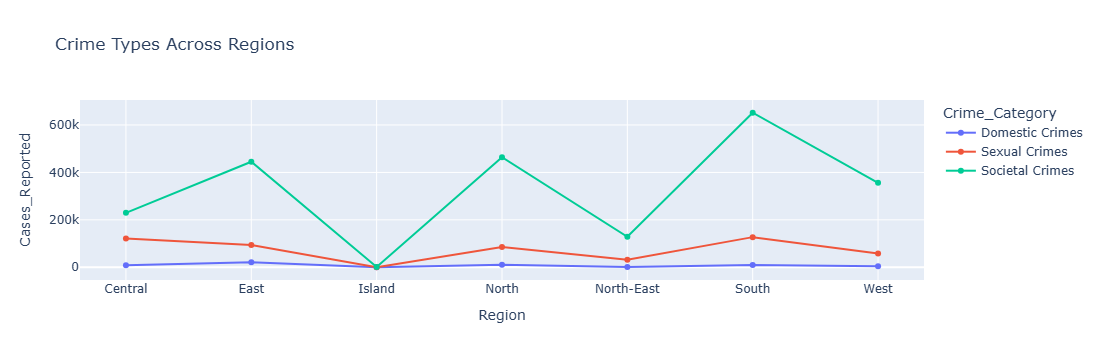

In [21]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# Map states to regions
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Map crime groups to categories
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_crimes = ['Rape', 'Sexual Harassment', 'Molestation']
harassment_crimes = ['Eve-teasing', 'Stalking']
kidnapping_crimes = ['Kidnapping & Abduction']

def categorize_crime(group_name):
    if group_name in domestic_crimes:
        return 'Domestic Crimes'
    elif group_name in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crimes'

# Add columns for region and crime category
df['Region'] = df['Area_Name'].map(region_mapping)
df['Crime_Category'] = df['Group_Name'].apply(categorize_crime)

# Filter out missing values
df_filtered = df.dropna(subset=['Region', 'Crime_Category'])

# Aggregate crime counts by region and category
crime_counts = df_filtered.groupby(['Region', 'Crime_Category'])['Cases_Reported'].sum().reset_index()

# Plot with Plotly
fig = px.line(crime_counts, x='Region', y='Cases_Reported', color='Crime_Category', 
              title='Crime Types Across Regions', markers=True)

fig.show()


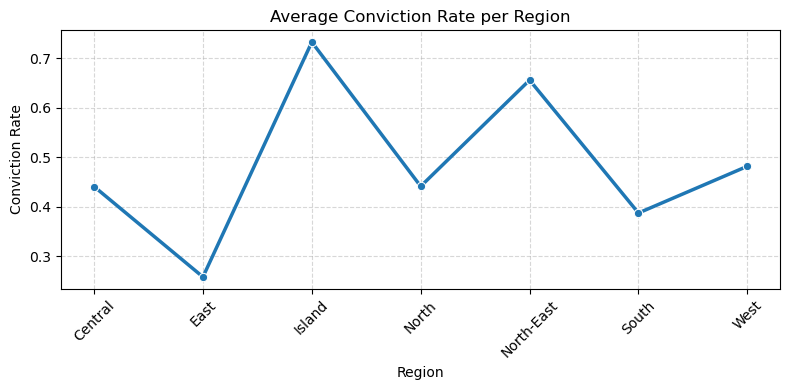

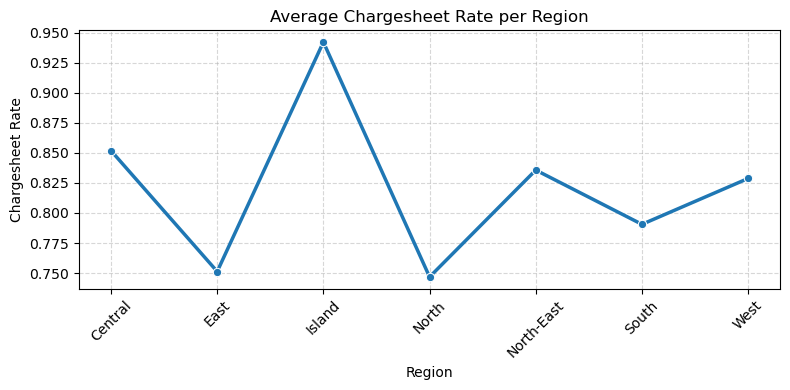

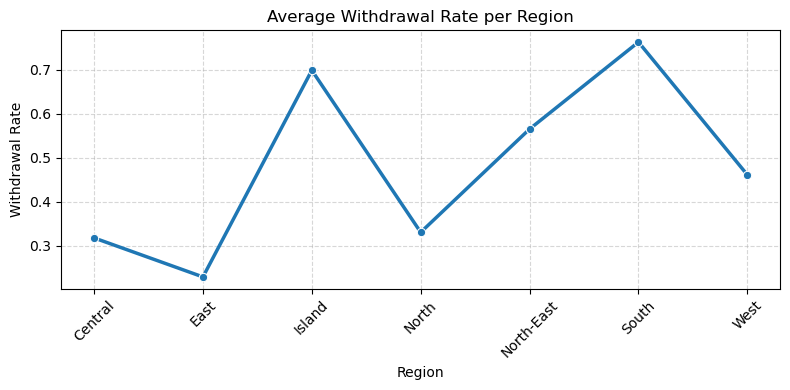

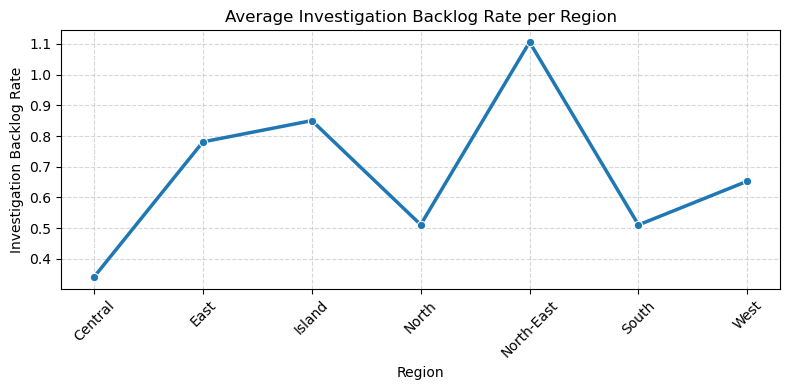

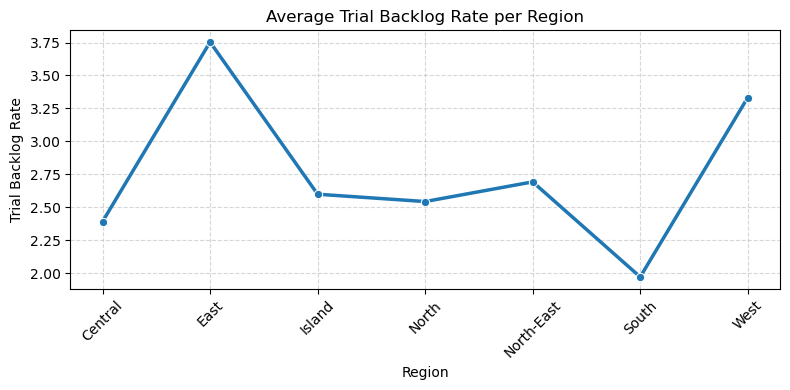

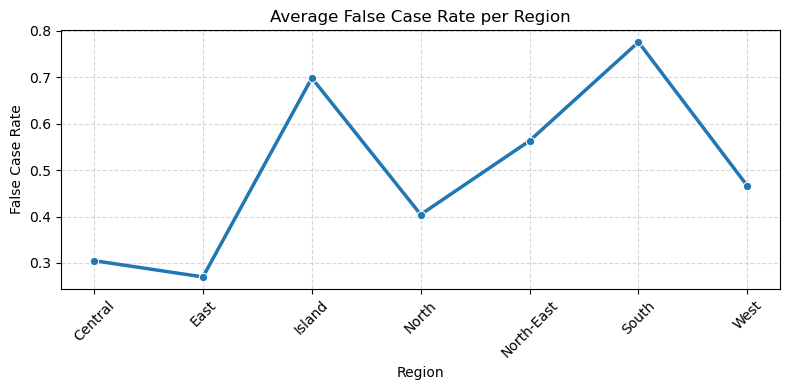

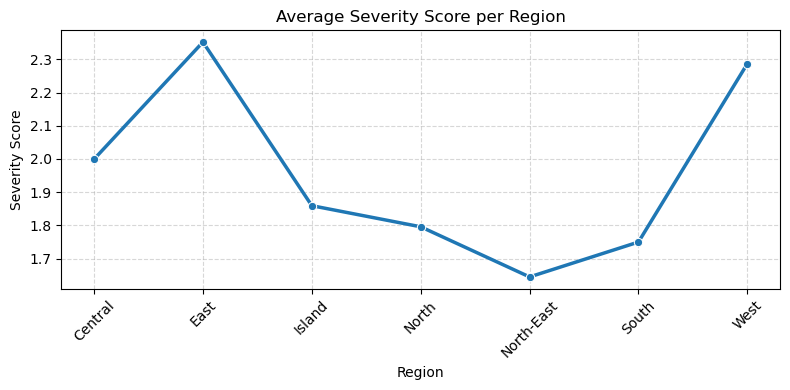

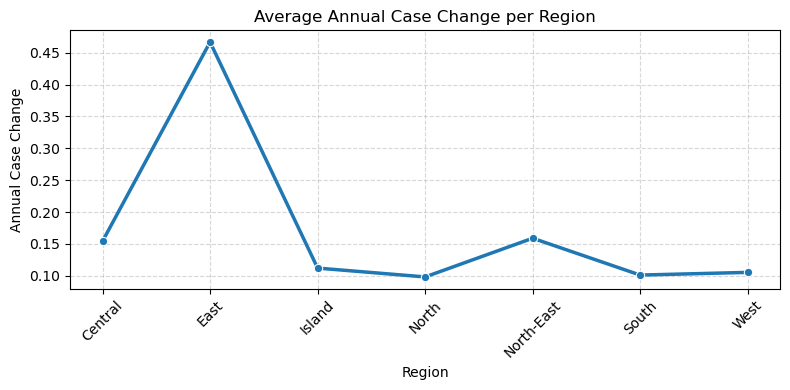

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of rate columns to plot

df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
rate_columns = [
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change'
]

# Aggregate means by region for each rate
for rate in rate_columns:
    temp_region = df.groupby('Region')[rate].mean().reset_index()
    temp_region = temp_region.sort_values('Region')
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=temp_region, x='Region', y=rate, marker='o', linewidth=2.5)
    plt.xticks(rotation=45)
    plt.title(f'Average {rate.replace("_", " ")} per Region')
    plt.xlabel('Region')
    plt.ylabel(rate.replace('_', ' '))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


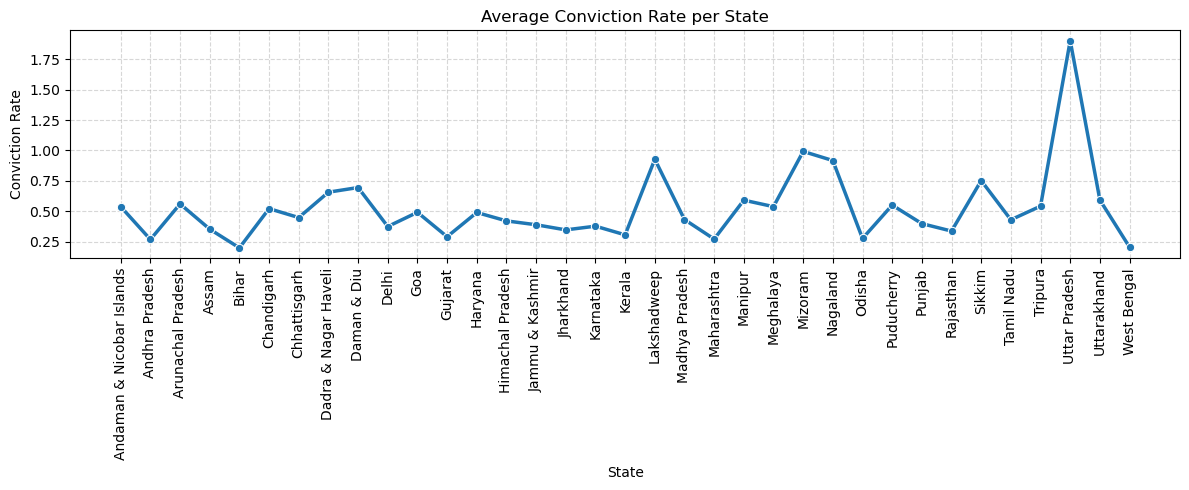

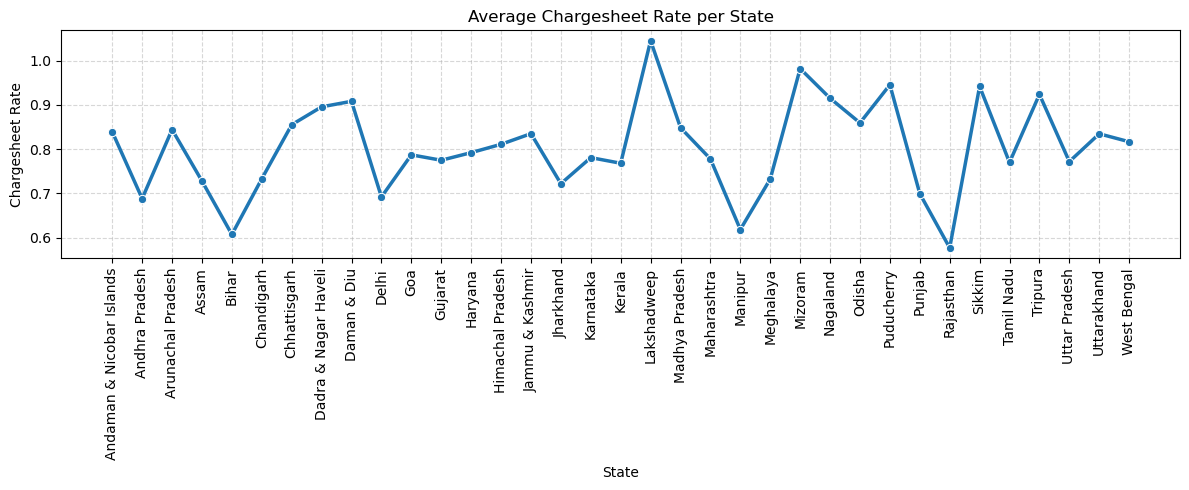

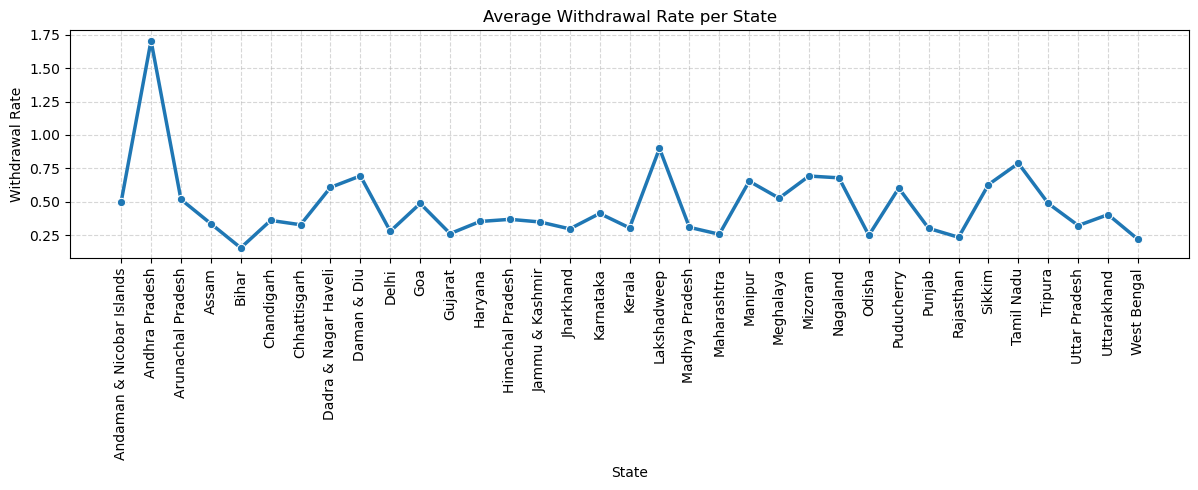

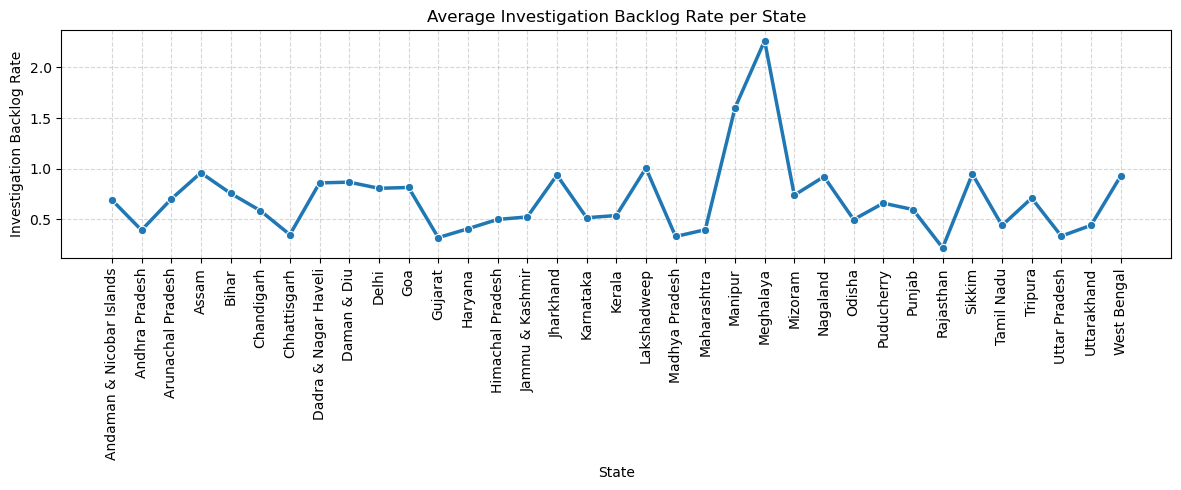

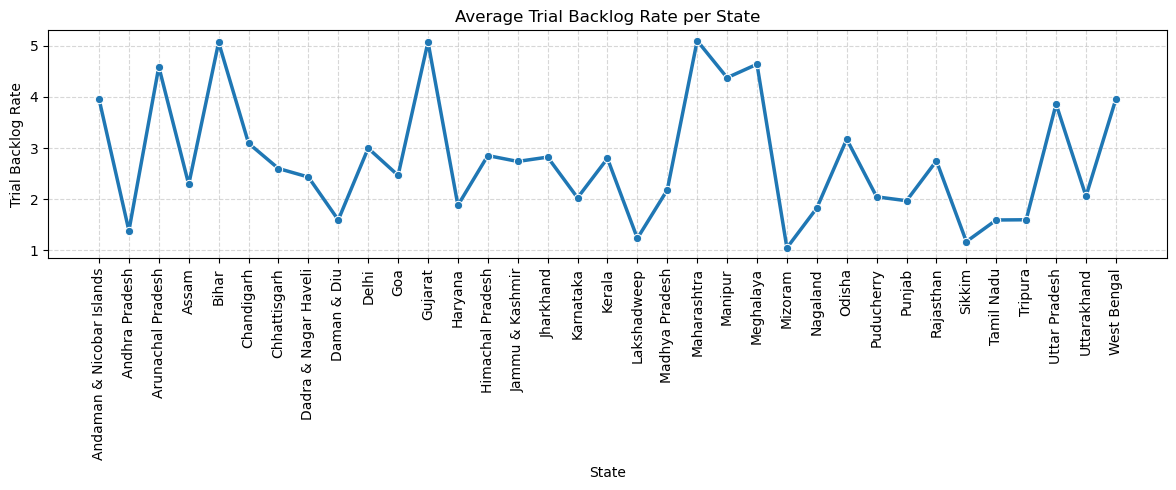

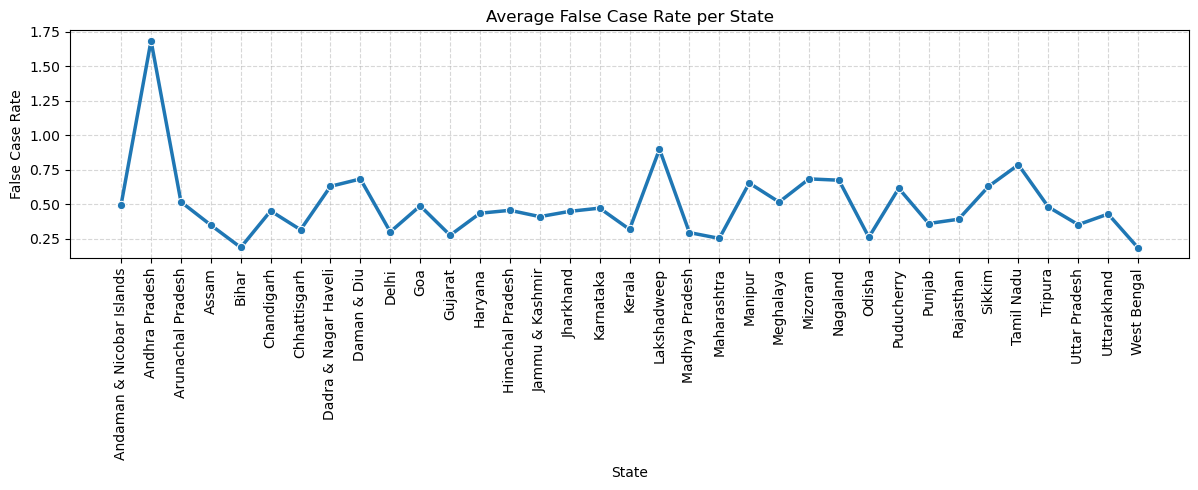

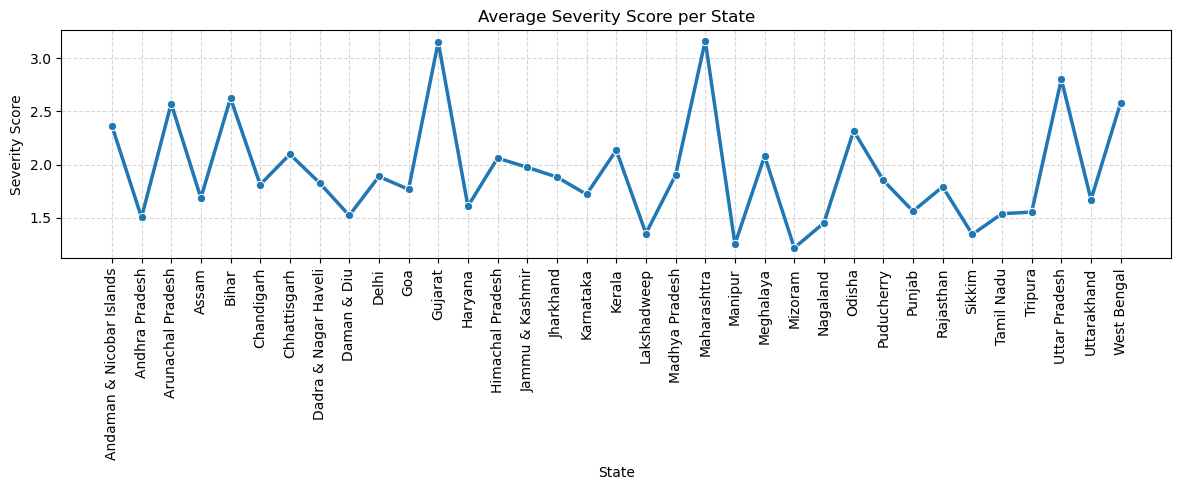

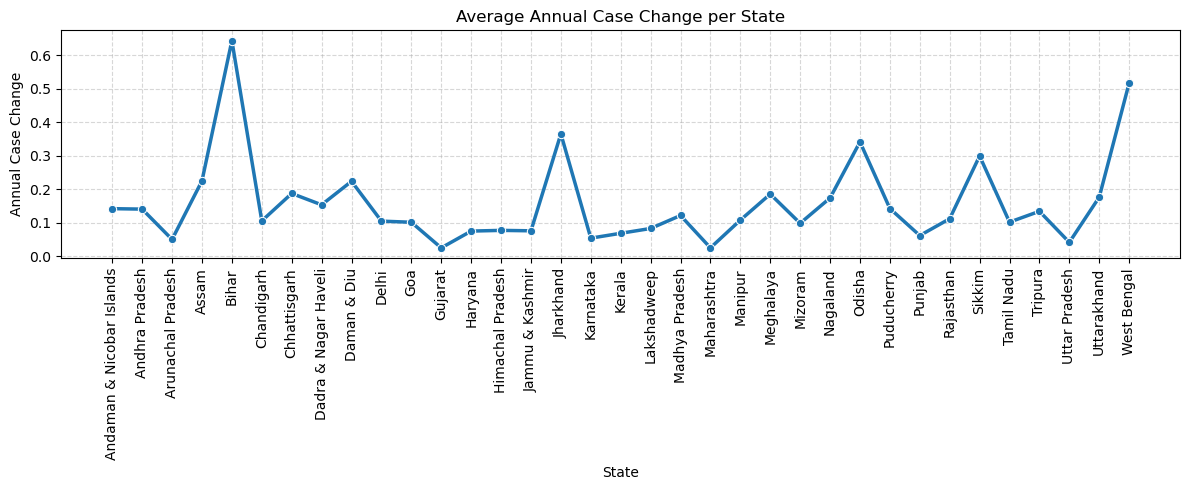

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of rate columns

df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
rate_columns = [
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change'
]

# For each rate, plot by state (Area_Name)
for rate in rate_columns:
    temp_state = df.groupby('Area_Name')[rate].mean().reset_index()
    temp_state = temp_state.sort_values('Area_Name')
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=temp_state, x='Area_Name', y=rate, marker='o', linewidth=2.5)
    plt.xticks(rotation=90)
    plt.title(f'Average {rate.replace("_", " ")} per State')
    plt.xlabel('State')
    plt.ylabel(rate.replace('_', ' '))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

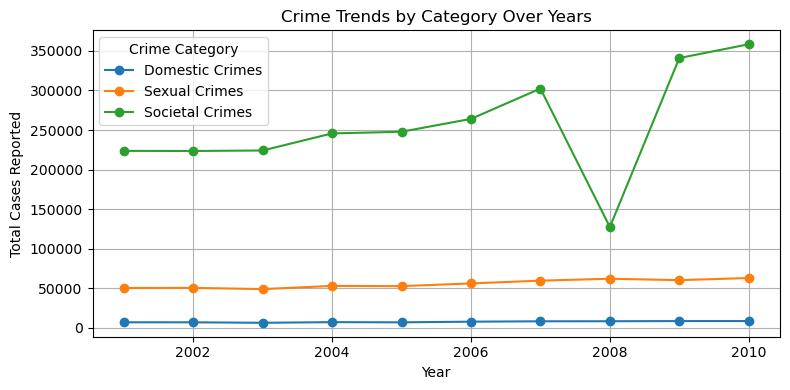

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('feature_engineering_output.xlsx')

# Clean column strings
df['Group_Name'] = df['Group_Name'].str.strip()

# Define your crime categories
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_crimes = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(crime):
    if crime in domestic_crimes:
        return 'Domestic Crimes'
    elif crime in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crimes'

# Create crime category column
df['Crime_Category'] = df['Group_Name'].apply(categorize_crime)

# Assuming 'Year' column exists and is numeric
df['Year'] = df['Year'].astype(int)

# Aggregate total cases by year and crime category
trend = df.groupby(['Year', 'Crime_Category'])['Cases_Reported'].sum().unstack(fill_value=0)

# Plot trend lines per crime category
plt.figure(figsize=(8,4))
for category in trend.columns:
    plt.plot(trend.index, trend[category], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Total Cases Reported')
plt.title('Crime Trends by Category Over Years')
plt.legend(title='Crime Category')
plt.grid(True)
plt.tight_layout()
plt.show()


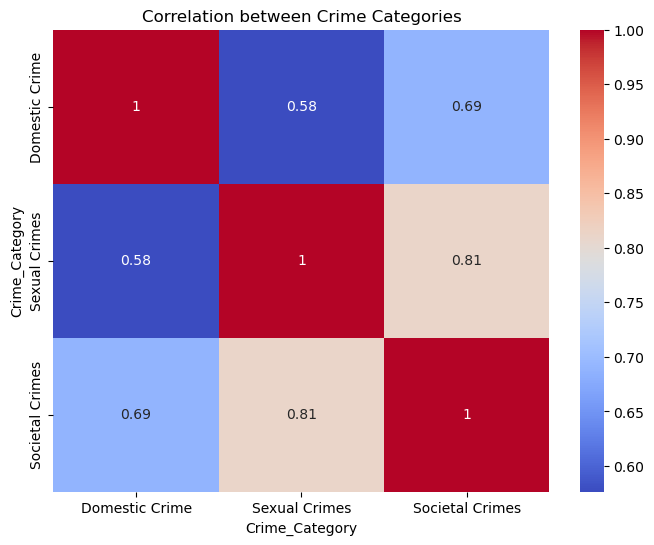

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('feature_engineering_output.xlsx')

# Define crime categories
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_crimes = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(crime):
    if crime in domestic_crimes:
        return 'Domestic Crime'
    elif crime in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crimes'

# Map crime categories
df['Crime_Category'] = df['Group_Name'].apply(categorize_crime)

# Aggregate total cases by crime category per Area_Name (you can change grouping if desired)
agg = df.groupby(['Area_Name', 'Crime_Category'])['Cases_Reported'].sum().unstack(fill_value=0)

# Calculate correlation matrix between crime categories
corr = agg.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Crime Categories")
plt.show()


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# Define region mapping (same as earlier)
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Define crime categories (same as before)
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_offenses = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(crime):
    if crime in domestic_crimes:
        return 'Domestic Crimes'
    elif crime in sexual_crimes:
        return 'Sexual Crimes'
    else:
        return 'Societal Crime'

# Apply region and crime category mappings in original dataframe
df['Region'] = df['Area_Name'].map(region_mapping)
df['Crime_Category'] = df['Group_Name'].apply(categorize_crime)

# Drop rows missing region or crime category
df_clean = df.dropna(subset=['Region', 'Crime_Category'])

# Aggregate sum of cases by region and crime category
agg = df_clean.groupby(['Region', 'Crime_Category'])[['Cases_Reported', 'Cases_Convicted']].sum().reset_index()

# Separate features/columns
X_numeric = agg[['Cases_Reported', 'Cases_Convicted']]
X_categorical = agg[['Region', 'Crime_Category']]

# One-hot encode categorical
ohe = OneHotEncoder()
X_cat_enc = ohe.fit_transform(X_categorical)

# Combine numeric and one-hot encoded categorical
import numpy as np
X_combined = np.hstack([X_numeric.values, X_cat_enc.toarray()])

# Scale numeric features (including one-hot if desired; usually only numeric are scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
agg['Cluster'] = kmeans.fit_predict(X_scaled)

print(agg[['Region', 'Crime_Category', 'Cases_Reported', 'Cases_Convicted', 'Cluster']])



        Region   Crime_Category  Cases_Reported  Cases_Convicted  Cluster
0      Central  Domestic Crimes            8459             2716        2
1      Central    Sexual Crimes          121515            27769        2
2      Central   Societal Crime          229487            53275        2
3         East  Domestic Crimes           21241             2819        2
4         East    Sexual Crimes           93911             8886        0
5         East   Societal Crime          444998            30623        1
6       Island  Domestic Crimes              24               21        0
7       Island    Sexual Crimes             317               62        0
8       Island   Societal Crime             857              205        0
9        North  Domestic Crimes           10314             3041        2
10       North    Sexual Crimes           85075            18763        0
11       North   Societal Crime          463821            70257        3
12  North-East  Domestic Crimes       

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



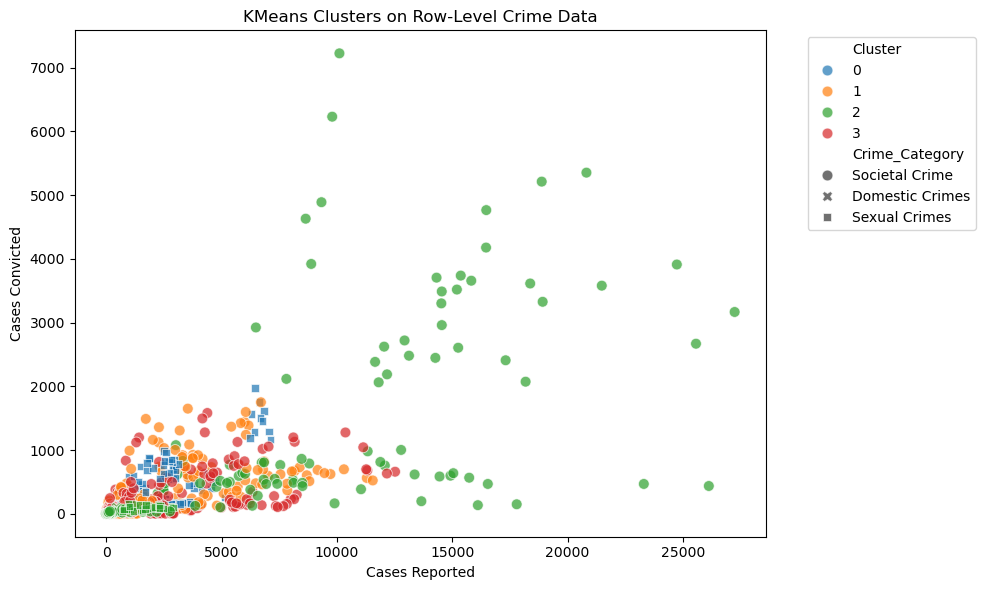

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# Region mapping dictionary
region_mapping = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North', 'Rajasthan': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South',
    'Tamil Nadu': 'South', 'Telangana': 'South',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    'Assam': 'North-East', 'Arunachal Pradesh': 'North-East', 'Nagaland': 'North-East',
    'Manipur': 'North-East', 'Mizoram': 'North-East', 'Tripura': 'North-East',
    'Meghalaya': 'North-East', 'Sikkim': 'North-East',
    'Andaman & Nicobar Islands': 'Island', 'Dadra & Nagar Haveli': 'West',
    'Daman & Diu': 'West', 'Lakshadweep': 'Island', 'Puducherry': 'South',
    'Chandigarh': 'North'
}

# Define crime categories
domestic_crimes = ['Dowry Deaths', 'Cruelty by Husband or Relatives', 'Domestic Violence']
sexual_offenses = ['Rape', 'Sexual Harassment', 'Molestation']

def categorize_crime(crime):
    if crime in domestic_crimes:
        return 'Domestic Crimes'
    elif crime in sexual_offenses:
        return 'Sexual Crimes'
    else:
        return 'Societal Crime'

# Apply mappings
df['Region'] = df['Area_Name'].map(region_mapping)
df['Crime_Category'] = df['Group_Name'].apply(categorize_crime)

# Drop rows with missing values
df = df.dropna(subset=['Region', 'Crime_Category', 'Cases_Reported', 'Cases_Convicted'])

# Prepare features
X_numeric = df[['Cases_Reported', 'Cases_Convicted']].values
X_categorical = df[['Region', 'Crime_Category']]

# OneHotEncode categorical features with dense output
ohe = OneHotEncoder(sparse_output=False)
X_cat_enc = ohe.fit_transform(X_categorical)

# Combine numeric and categorical features
X_combined = np.hstack([X_numeric, X_cat_enc])

# Scale combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Cases_Reported',
    y='Cases_Convicted',
    hue='Cluster',
    style='Crime_Category',
    palette='tab10',
    s=60,
    alpha=0.7
)
plt.title('KMeans Clusters on Row-Level Crime Data')
plt.xlabel('Cases Reported')
plt.ylabel('Cases Convicted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Load your dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# Columns for year and reported cases (update if different)
year_column = 'Year'
cases_column = 'Cases_Reported'

# India population data by year
india_population = {
    2001: 1077898572,
    2002: 1097600381,
    2003: 1116802997,
    2004: 1135991510,
    2005: 1154676319,
    2006: 1172878890,
    2007: 1190676028,
    2008: 1207930962,
    2009: 1225524760,
    2010: 1242612000
}

# Aggregate total reported cases by year
yearly_cases = df.groupby(year_column)[cases_column].sum().reset_index()

# Map population by year
yearly_cases['India_Population'] = yearly_cases[year_column].map(india_population)

# Calculate crime rate per 100,000 population
yearly_cases['Crime_Rate'] = (yearly_cases[cases_column] / yearly_cases['India_Population']) * 100000

# View final aggregated dataframe
print(yearly_cases)

# Optionally save aggregated data
yearly_cases.to_excel('yearly_crime_rate.xlsx', index=False)


   Year  Cases_Reported  India_Population  Crime_Rate
0  2001          280785        1077898572   26.049297
1  2002          280734        1097600381   25.577068
2  2003          279249        1116802997   25.004320
3  2004          305648        1135991510   26.905835
4  2005          307268        1154676319   26.610748
5  2006          327799        1172878890   27.948239
6  2007          370078        1190676028   31.081335
7  2008          197505        1207930962   16.350686
8  2009          409639        1225524760   33.425600
9  2010          429745        1242612000   34.584005


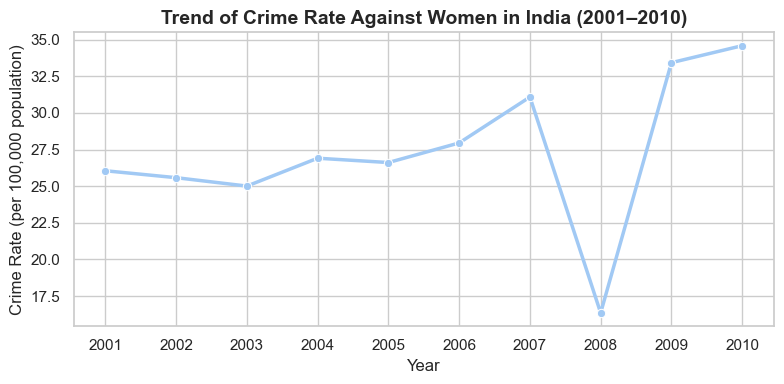

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# Columns for year and reported cases
year_column = 'Year'
cases_column = 'Cases_Reported'

# India population data by year
india_population = {
    2001: 1077898572,
    2002: 1097600381,
    2003: 1116802997,
    2004: 1135991510,
    2005: 1154676319,
    2006: 1172878890,
    2007: 1190676028,
    2008: 1207930962,
    2009: 1225524760,
    2010: 1242612000
}

# Aggregate total reported cases by year
yearly_cases = df.groupby(year_column)[cases_column].sum().reset_index()

# Map population by year
yearly_cases['India_Population'] = yearly_cases[year_column].map(india_population)

# Calculate crime rate per 100,000 population
yearly_cases['Crime_Rate'] = (yearly_cases[cases_column] / yearly_cases['India_Population']) * 100000

# --- Visualization Section ---
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=yearly_cases,
    x=year_column,
    y='Crime_Rate',
    marker='o',
    linewidth=2.5
)

# Add labels and title
plt.title('Trend of Crime Rate Against Women in India (2001–2010)', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Rate (per 100,000 population)', fontsize=12)
plt.xticks(yearly_cases[year_column])
plt.tight_layout()
plt.show()

# Optionally save the aggregated data
yearly_cases.to_excel('yearly_crime_rate.xlsx', index=False)


In [30]:
national_sum = df['Cases_Reported'].sum()
print(f"Total crime cases reported nationally: {national_sum}")


Total crime cases reported nationally: 3188450


Statewise National Average Crime Rate per 100,000 (2001-2010):


Area_Name  Cases_Reported  Crime_Rate_Per_100k_National
1   Andhra Pradesh          392245                      3.374849
32   Uttar Pradesh          340159                      2.926705
19  Madhya Pradesh          287392                      2.472701
20     Maharashtra          279662                      2.406193
34     West Bengal          268730                      2.312135
28       Rajasthan          266790                      2.295443
17          Kerala          138017                      1.187489
30      Tamil Nadu          136121                      1.171176
11         Gujarat          134806                      1.159862
3            Assam          130323                      1.121290
4            Bihar          126590                      1.089172
16       Karnataka          119684                      1.029753
25          Odisha          115409                      0.992971
12         Haryana           87521                      0.753025
9            Delhi           76238                      0.655947

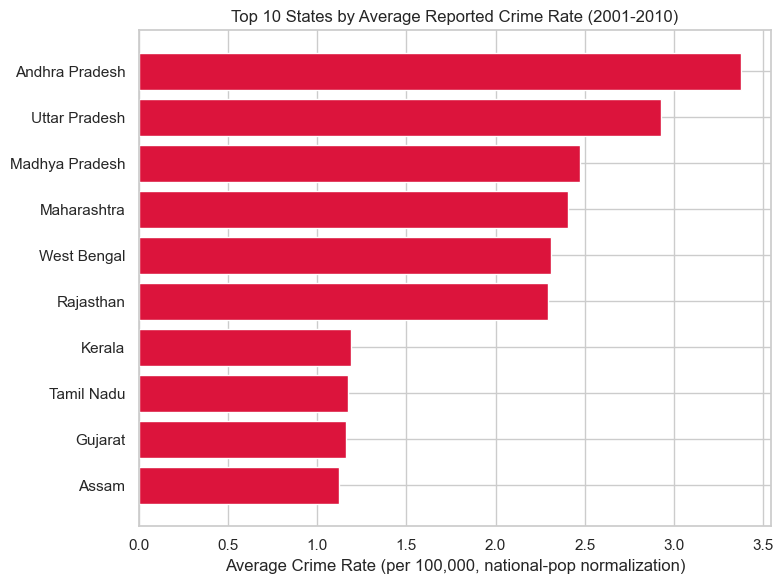


Data saved to 'statewise_national_avg_crime_rate_2001_2010.xlsx'


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load your dataset
df = pd.read_excel('feature_engineering_output.xlsx')

# India population data by year (2001-2010)
india_population = {
    2001: 1077898572,
    2002: 1097600381,
    2003: 1116802997,
    2004: 1135991510,
    2005: 1154676319,
    2006: 1172878890,
    2007: 1190676028,
    2008: 1207930962,
    2009: 1225524760,
    2010: 1242612000
}

# Total India population for period
total_india_population = sum(india_population.values())

# Aggregate total reported cases per state over all years
state_total_cases = df.groupby('Area_Name')['Cases_Reported'].sum().reset_index()

# Calculate state-wise crime rate per 100,000 (using total India population over period for normalization)
state_total_cases['Crime_Rate_Per_100k_National'] = (state_total_cases['Cases_Reported'] / total_india_population) * 100000

# Sort by rate descending
state_total_cases_sorted = state_total_cases.sort_values('Crime_Rate_Per_100k_National', ascending=False)

# --- Display Table (first 15 states) ---
print("Statewise National Average Crime Rate per 100,000 (2001-2010):")
display(state_total_cases_sorted[['Area_Name', 'Cases_Reported', 'Crime_Rate_Per_100k_National']].head(15))

# --- Bar Plot for Top 10 States by Rate ---
top_states = state_total_cases_sorted.head(10)
plt.figure(figsize=(8, 6))
plt.barh(top_states['Area_Name'][::-1], top_states['Crime_Rate_Per_100k_National'][::-1], color='crimson')
plt.xlabel('Average Crime Rate (per 100,000, national-pop normalization)')
plt.title('Top 10 States by Average Reported Crime Rate (2001-2010)')
plt.tight_layout()
plt.show()

# --- Optionally Save Table to Excel ---
state_total_cases_sorted.to_excel('statewise_national_avg_crime_rate_2001_2010.xlsx', index=False)
print("\nData saved to 'statewise_national_avg_crime_rate_2001_2010.xlsx'")


In [34]:
import pandas as pd

# Calculate mean values of each rate by state
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))
state_scores = df.groupby('Area_Name').agg({
    'Conviction_Rate': 'mean',
    'Chargesheet_Rate': 'mean',
    'Withdrawal_Rate': 'mean',
    'Investigation_Backlog_Rate': 'mean',
    'Trial_Backlog_Rate': 'mean',
    'False_Case_Rate': 'mean',
    'Severity_Score': 'mean',
    'Annual_Case_Change': 'mean'
}).reset_index()

# Define effectiveness score: positive features get higher, negative get lower points
state_scores['Crime_Control_Effectiveness_Score'] = (
    2 * state_scores['Conviction_Rate'] + 
    2 * state_scores['Chargesheet_Rate'] - 
    state_scores['Withdrawal_Rate'] - 
    state_scores['Investigation_Backlog_Rate'] -
    state_scores['Trial_Backlog_Rate'] - 
    state_scores['Severity_Score']
)

# Rank states: Top N = Most Effective, Bottom N = Least Effective
state_scores = state_scores.sort_values('Crime_Control_Effectiveness_Score', ascending=False)
most_effective_states = state_scores.head(10)[['Area_Name', 'Crime_Control_Effectiveness_Score']]
least_effective_states = state_scores.tail(10)[['Area_Name', 'Crime_Control_Effectiveness_Score']]

print("--- Most Effective States ---")
print(most_effective_states)
print("--- Least Effective States ---")
print(least_effective_states)


--- Most Effective States ---
        Area_Name  Crime_Control_Effectiveness_Score
23        Mizoram                           0.248519
18    Lakshadweep                          -0.548852
29         Sikkim                          -0.704467
24       Nagaland                          -1.216701
31        Tripura                          -1.417355
8     Daman & Diu                          -1.471361
12        Haryana                          -1.685183
33    Uttarakhand                          -1.720335
30     Tamil Nadu                          -1.960898
32  Uttar Pradesh                          -1.971194
--- Least Effective States ---
                    Area_Name  Crime_Control_Effectiveness_Score
9                       Delhi                          -3.836036
25                     Odisha                          -3.965398
0   Andaman & Nicobar Islands                          -4.761477
21                    Manipur                          -5.458698
2           Arunachal Pradesh  

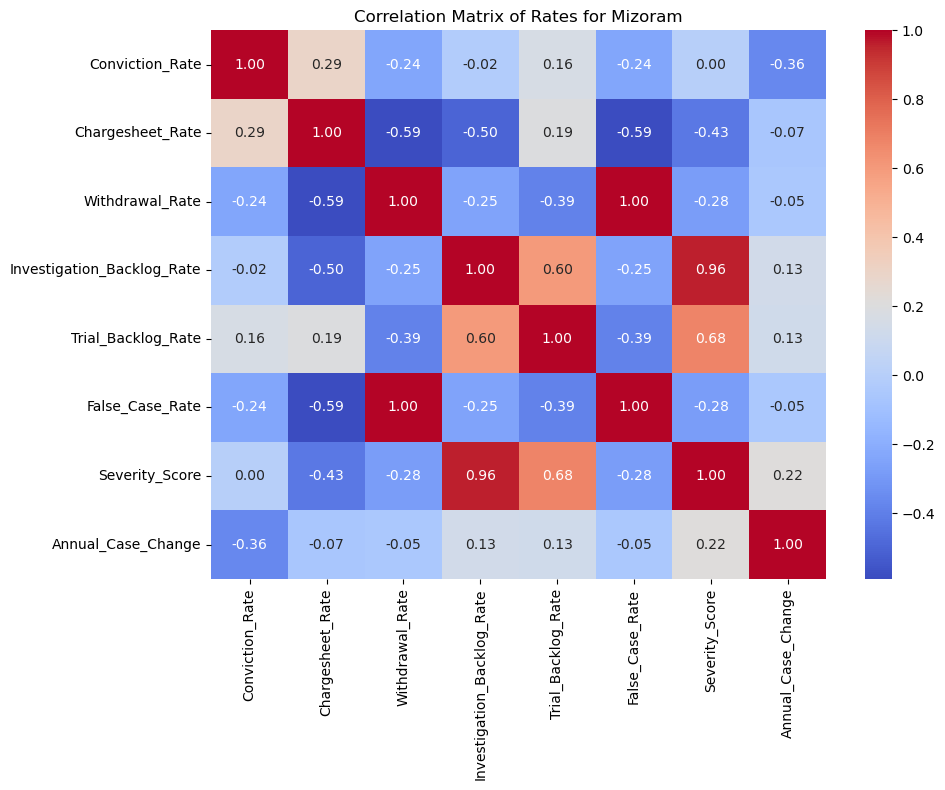

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('42_Cases_under_crime_against_women (1).xlsx')
df['Severity_Score'] = (1+ 0.5 * (df["Cases_Pending_Trial_at_Year_End"] / df["Cases_Reported"])- 0.3 * (df["Cases_Convicted"] / df["Cases_Reported"]))

rate_columns = [
    'Conviction_Rate', 'Chargesheet_Rate', 'Withdrawal_Rate',
    'Investigation_Backlog_Rate', 'Trial_Backlog_Rate', 'False_Case_Rate',
    'Severity_Score', 'Annual_Case_Change'
]

# Recreate the features
df['Conviction_Rate'] = df['Cases_Convicted'] / df['Cases_Reported']
df['Chargesheet_Rate'] = df['chargesheet_police_work'] / df['Cases_Reported']
df['Withdrawal_Rate'] = df['Cases_Withdrawn_by_the_Govt'] / df['Cases_Reported']
df['Investigation_Backlog_Rate'] = df['Cases_Pending_Investigation_at_Year_End'] / df['Cases_Reported']
df['Trial_Backlog_Rate'] = df['Cases_Pending_Trial_at_Year_End'] / df['Cases_Sent_for_Trial']
df['False_Case_Rate'] = df['Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law'] / df['Cases_Reported']
df['Severity_Score'] = df['Cases_Pending_Investigation_at_Year_End'] / (df['Cases_Reported'] + 1)
df.sort_values(['Area_Name', 'Group_Name', 'Year'], inplace=True)
df['Annual_Case_Change'] = df.groupby(['Area_Name', 'Group_Name'])['Cases_Reported'].pct_change()

# Choose the state you want to visualize (change if needed)
state_to_plot = 'Mizoram'
state_df = df[df['Area_Name'] == state_to_plot][rate_columns]
if state_df.shape[0] >= 5:  # Only plot if enough data
    corr = state_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix of Rates for {state_to_plot}')
    plt.tight_layout()
    plt.show()